- http://keunwoochoi.blogspot.com/2016/03/2.html
- http://www.rex-ai.info/docs/AI_Example_CNN_speech_recognize
- https://www.youtube.com/watch?v=oltGIc4uo5c
- https://youdaeng-com.tistory.com/5
- https://quokkas.tistory.com/37 : early stopping
- https://continuous-development.tistory.com/166 : stratified kfold
- https://deep-learning-study.tistory.com/476 fiter 시각화
- https://wyatt37.tistory.com/10 : random over sampling

In [1]:
import wandb

#default param
run_config = dict(
    # spectrum
    sample_rate=16000,
    n_fft=1024,
    n_mels=128,
    hop_length=100,
    win_length=400,
    f_max=80000,
    
    # training
    batch_size=32,
    
    # data
    fold=1,
)


In [2]:



sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "HyperParam for mel",
    "method": "grid",
    "parameters": {
      "n_mels" :{
           "values":[32,64,96,128,160,192]
       },
      "n_fft": {
            "values": [1024,2048,3072,4096,8192]
        },
      "win_length": {
            "values": [300,350,400,450,500,1024,1524,2048]
        },
       "hop_length": {
          "values": [50,100,200,300,400,500,600]
      },
       "f_max":{
          "values":[8000,9000,10000,12000,18000,20000,40000,60000]
      },
      "fold":{
          "values" : [1,]
      }
    }
}

sweep_id = wandb.sweep(sweep_config)



Create sweep with ID: fil8fxo6
Sweep URL: https://wandb.ai/bub3690/uncategorized/sweeps/fil8fxo6


In [2]:
# n_mels

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "n_mel",
  "method": "grid",
  "parameters": {
      "n_mels" :{
           "values":[32,64,96,128,160,192]
       },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep",entity="bub3690")


Create sweep with ID: u1aqd5nx
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/u1aqd5nx


In [3]:
# n_fft

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "n_fft",
  "method": "grid",
  "parameters": {
      "n_fft": {
            "values": [1024,2048,3072,4096,8192]
        },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep",entity="bub3690")


Create sweep with ID: a9z2vym9
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/a9z2vym9


In [5]:
# win_length

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "win_length",
  "method": "grid",
  "parameters": {
      "win_length": {
            "values": [300,350,400,450,500,1024,1524,2048]
        },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep",entity="bub3690")


Create sweep with ID: hy9bi35f
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/hy9bi35f


In [2]:
# hop_length

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "hop_length",
  "method": "grid",
  "parameters": {
       "hop_length": {
          "values": [50,100,200,300,400,500,600]
      },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep",entity="bub3690")


Create sweep with ID: vbxfcusk
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/vbxfcusk


In [2]:
# f_max

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "f_max",
  "method": "grid",
  "parameters": {
       "f_max":{
          "values":[8000,9000,10000,12000,18000,20000,40000,60000]
      },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep",entity="bub3690")


Create sweep with ID: pdb3pd9z
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/pdb3pd9z


In [2]:
# batch_size

sweep_config = {
    "project" : "SVD-voice-disorder",
    "name": "batch_size",
  "method": "grid",
  "parameters": {
      "batch_size" :{
           "values":[8,16,32,64,128]
       },
      "fold":{
          "values" : [1,2,3,4,5]
      }
    }
}

sweep_id = wandb.sweep(sweep_config,project="SVD-hyp-sweep",entity="bub3690")


Create sweep with ID: j9mfv8ql
Sweep URL: https://wandb.ai/bub3690/SVD-hyp-sweep/sweeps/j9mfv8ql


In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
from torchvision import transforms, datasets
import pandas as pd
import os
from glob import glob
import torchvision.models as models
import sys

p = os.path.abspath('../..') # 상위 폴더를 사용하기 위해서.
sys.path.insert(1, p)
from pytorchtools.pytorchtools import EarlyStopping # 상위 폴더에 추가된 모듈.


if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  1.10.2  Device :  cuda


# SVD 문장 데이터에서 Feature 추출
- mfcc

In [4]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.

# 데이터 나누기 - Stratified KFold

- pathology : 1194 / healthy : 634 / 총 1828
- k = 5

## 1. test/ train 나누기


In [5]:
#1. train, test 나누기

import os
from glob import glob
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split # train , test 분리에 사용.


pathology = glob('D:/project/voice_pathology_ai/voice_data/organics/pathology/phrase/*.wav')
healthy = glob('D:/project/voice_pathology_ai/voice_data/organics/healthy/phrase/*.wav')
print("Pathology : ",len(pathology))
print("Healthy: ",len(healthy))

pathology= [ path.split("\\")[-1] for path in pathology] # path 데이터 변환.
healthy= [ path.split("\\")[-1] for path in healthy] # path 데이터 변환.
 # path 데이터 변환 #외부데이터로 가져오기위해서, 번호만 남긴다

    
X = pathology+healthy # path 데이터 합
print("총 데이터수 : ",len(X))
Y = [] # 라벨
for idx,x in enumerate(X):
    if idx<597:
        Y.append("pathology")
    else:
        Y.append("healthy")

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=456)
#stratify를 넣어서, test에도 라벨별 잘 분류되게 한다.

print("---")
print("훈련 셋 : ",len(Y),Counter(Y))
print("테스트 셋 : ",len(Y_test),Counter(Y_test))
print("---")

Pathology :  597
Healthy:  634
총 데이터수 :  1231
---
훈련 셋 :  984 Counter({'healthy': 507, 'pathology': 477})
테스트 셋 :  247 Counter({'healthy': 127, 'pathology': 120})
---


## 2. stratified k-fold

In [7]:
#1. train, test 나누기
#stratified kfold
import os
import random #데이터 shuffle 사용
from glob import glob
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter



skf_iris = StratifiedKFold(n_splits=5,shuffle=True,random_state=456)
cnt_iter = 0

X_train_list = [] #데이터 셋 보관
Y_train_list = []

X_valid_list = []
Y_valid_list = []

for train_idx, test_idx in skf_iris.split(X,Y):
    
    #split으로 반환된 인덱스를 이용하여, 학습 검증용 테스트 데이터 추출
    cnt_iter += 1
    X_train, X_valid = [X[idx] for idx in train_idx.tolist() ], [X[idx] for idx in test_idx.tolist() ]
    Y_train, Y_valid = [Y[idx] for idx in train_idx.tolist() ], [Y[idx] for idx in test_idx.tolist() ]
    
    X_train_list.append(X_train)
    X_valid_list.append(X_valid)
    
    Y_train_list.append(Y_train)
    Y_valid_list.append(Y_valid)
    
    
    #학습 및 예측
    
    label_train = Y_train
    label_test = Y_valid
    unique_train, train_counts = np.unique(label_train, return_counts = True)
    unique_test, test_counts = np.unique(label_test, return_counts = True)
    
    uniq_cnt_train = dict(zip(unique_train, train_counts))
    uniq_cnt_test = dict(zip(unique_test, test_counts))
    
    
    
    print('교차 검증 : {}'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n', uniq_cnt_train)
    print('검증 레이블 데이터 분포 : \n', uniq_cnt_test,'\n')



교차 검증 : 1
학습 레이블 데이터 분포 : 
 {'healthy': 406, 'pathology': 381}
검증 레이블 데이터 분포 : 
 {'healthy': 101, 'pathology': 96} 

교차 검증 : 2
학습 레이블 데이터 분포 : 
 {'healthy': 406, 'pathology': 381}
검증 레이블 데이터 분포 : 
 {'healthy': 101, 'pathology': 96} 

교차 검증 : 3
학습 레이블 데이터 분포 : 
 {'healthy': 405, 'pathology': 382}
검증 레이블 데이터 분포 : 
 {'healthy': 102, 'pathology': 95} 

교차 검증 : 4
학습 레이블 데이터 분포 : 
 {'healthy': 405, 'pathology': 382}
검증 레이블 데이터 분포 : 
 {'healthy': 102, 'pathology': 95} 

교차 검증 : 5
학습 레이블 데이터 분포 : 
 {'healthy': 406, 'pathology': 382}
검증 레이블 데이터 분포 : 
 {'healthy': 101, 'pathology': 95} 



## 3. random over sampling

In [8]:
#2. random over sampling
for i in range(5):
    X_temp = np.array(X_train_list[i]).reshape(-1,1)#각 데이터를 다 행으로 넣음. (1194,1)
    #Y = np.array(Y)
    ros = RandomOverSampler(random_state = 123)
    X_res,Y_res = ros.fit_resample(X_temp,Y_train_list[i])
    
    print("\n fold{} ".format(i))
    print('before dataset shape {}'.format(Counter(Y_train_list[i])) )
    print('Resampled dataset shape {}'.format(Counter(Y_res)) )   
    
    #원래대로 돌리기
    X_res=X_res.reshape(1, -1)
    X_train_list[i]=X_res[0].tolist()
    Y_train_list[i]=Y_res





 fold0 
before dataset shape Counter({'healthy': 406, 'pathology': 381})
Resampled dataset shape Counter({'pathology': 406, 'healthy': 406})

 fold1 
before dataset shape Counter({'healthy': 406, 'pathology': 381})
Resampled dataset shape Counter({'healthy': 406, 'pathology': 406})

 fold2 
before dataset shape Counter({'healthy': 405, 'pathology': 382})
Resampled dataset shape Counter({'pathology': 405, 'healthy': 405})

 fold3 
before dataset shape Counter({'healthy': 405, 'pathology': 382})
Resampled dataset shape Counter({'pathology': 405, 'healthy': 405})

 fold4 
before dataset shape Counter({'healthy': 406, 'pathology': 382})
Resampled dataset shape Counter({'pathology': 406, 'healthy': 406})


In [10]:
import pickle

 
#load
with open("D:/project/voice_pathology_ai/voice_data/organics/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)

    

# 데이터 정의
- 추가적으로 데이터의 크기를 맞춰주기 위해 3초로 padding 및 truncate 실시 https://sequencedata.tistory.com/25 FixAudioLength
- 논문에서는 400frame으로 설정.(여기서는 500frame)
- 전처리 방법 결정.


In [11]:
from torch.utils.data import Dataset, DataLoader

classes = ["pathology","healthy"]
sr=16000
#win_length =  np.int64(16000/40) # 400
#n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding. 세로 길이
#hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.



class svd_dataset(Dataset):
    def __init__(self,data_path_list,classes,data_num,training,mel_params,transform=None,normalize=None):
        #클래스에서 사용할 인자를 받아 인스턴스 변수로 저장하는 일을 한다.
        #예를들면, 이미지의 경로 리스트를 저장하는 일을 하게 된다.
        
        #data_num : k 개 데이터 셋 중 어떤것을 쓸지
        #test인지 아닌지.
        
        self.path_list = data_path_list[data_num]
        self.data_num = data_num
        self.training = training
        self.label = svd_dataset.get_label(self.path_list,training,data_num)
        self.classes = classes
        self.transform = transform
        self.normalize = normalize
        
        # sweep params
        self.mel_params = mel_params
        # hop_length , win_length , n_mels , n_fft , f_max , batch_size
        
        
    
    @classmethod
    def get_label(cls,data_path_list,training,data_num):
        label_list=[]
        
        if training:
            for idx,x in enumerate(data_path_list):
                label_list.append(Y_train_list[data_num][idx])
        else:
            for idx,x in enumerate(data_path_list):
                label_list.append(Y_valid_list[data_num][idx])
        #print(label_list)
        return label_list
    
    
    def __len__(self):
        return len(self.path_list)
        #데이터 셋의 길이를 정수로 반환한다.     
    
       
    def __getitem__(self, idx):
        """
        1. path를 받아서, 소리에서 mfcc를 추출
        2. mfcc를 224프레임으로 패딩.
        3. resnet에 사용되기 위해 3채널로 복사(rgb 처럼)
        4. 0~1 정규화
        
        """
        sig = phrase_dict[self.path_list[idx]] # 16000hz 실시
        length = 29990 #300 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
        pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
        sig = pad1d(sig,length)        
        
        ###signal norm
        sig = (sig-sig.mean())/sig.std()
        ###

        mel_feature = librosa.feature.melspectrogram(y=sig,
                                                     sr=sr,
                                                     # hyp param
                                                     n_mels = self.mel_params["n_mels"],
                                                     n_fft = self.mel_params["n_fft"],
                                                     win_length = self.mel_params["win_length"],
                                                     hop_length = self.mel_params["hop_length"],
                                                     fmax = self.mel_params["f_max"]
                                                    )
        mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
        #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
        
        #pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
        #mel_feature = pad2d(mel_feature, length)
        
        
        
        if self.transform:
            #print('transform')
            mel_feature=self.transform(mel_feature).type(torch.float32)# 데이터 0~1 정규화
            mel_feature=torch.stack([mel_feature,mel_feature,mel_feature])# 3채널로 복사.
            mel_feature = mel_feature.squeeze(dim=1)
            
            # global normalize
            if self.normalize:
                mel_feature=self.normalize(mel_feature)            
        else:
            #print("else")
            mel_feature = torch.from_numpy(mel_feature).type(torch.float32)
            mel_feature=mel_feature.unsqueeze(0)#cnn 사용위해서 추가
            #MFCCs = MFCCs.permute(2, 0, 1)
        return mel_feature, self.classes.index(self.label[idx])
    

In [12]:

# test set 제작을 위한 class
class svd_test_set(Dataset):
    def __init__(self,data_path_list,classes,mel_params,transform=None,normalize=None):
        #클래스에서 사용할 인자를 받아 인스턴스 변수로 저장하는 일을 한다.
        #예를들면, 이미지의 경로 리스트를 저장하는 일을 하게 된다.
        
        #data_num : k 개 데이터 셋 중 어떤것을 쓸지
        #test인지 아닌지.
        
        self.path_list = data_path_list
        self.label = svd_test_set.get_label(self.path_list)
        self.classes=classes
        self.transform=transform
        self.normalize=normalize
        
        # sweep params
        self.mel_params = mel_params
        # hop_length , win_length , n_mels , n_fft , f_max , batch_size        
        
    
    @classmethod
    def get_label(cls,data_path_list):
        label_list=[]
        
        for idx,x in enumerate(data_path_list):
            label_list.append(Y_test[idx])
        #print(label_list)
        return label_list
    
    def __len__(self):
        return len(self.path_list)
        #데이터 셋의 길이를 정수로 반환한다. 
        
    def __getitem__(self, idx):
        """
        1. path를 받아서, 소리에서 mfcc를 추출
        2. mfcc를 224프레임으로 패딩.
        3. resnet에 사용되기 위해 3채널로 복사(rgb 처럼)
        4. 0~1 정규화
        
        """
        sig= phrase_dict[self.path_list[idx]] # 16000hz 실시
        length=29990 #300 padding을 위한 파라미터
        pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
        sig = pad1d(sig,length)        
        
        ###signal norm
        sig = (sig-sig.mean())/sig.std()
        ###        
        
        mel_feature = librosa.feature.melspectrogram(y=sig,
                                                     sr=sr,
                                                     # hyp param
                                                     n_mels = self.mel_params["n_mels"],
                                                     n_fft = self.mel_params["n_fft"],
                                                     win_length = self.mel_params["win_length"],
                                                     hop_length = self.mel_params["hop_length"],
                                                     fmax = self.mel_params["f_max"]
                                                    )
        mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
        
        
        
        
        if self.transform:
            #print('transform')
            mel_feature=self.transform(mel_feature).type(torch.float32)# 데이터 0~1 정규화
            mel_feature=torch.stack([mel_feature,mel_feature,mel_feature])# 3채널로 복사.
            mel_feature = mel_feature.squeeze(dim=1)
            
            # global normalize
            if self.normalize:
                mel_feature=self.normalize(mel_feature)    
        else:
            #print("else")
            mel_feature = torch.from_numpy(mel_feature).type(torch.float32)
            mel_feature=mel_feature.unsqueeze(0)#cnn 사용위해서 추가
            #MFCCs = MFCCs.permute(2, 0, 1)
        return mel_feature, self.classes.index(self.label[idx])
    
    

# 데이터 로더

In [13]:
#3. 하이퍼 파라미터
BATCH_SIZE =  32 #한 배치당 32개 음성데이터
EPOCHS = 40 # 전체 데이터 셋을 50번 반복
lr=0.0001
augment_kind="no"


In [14]:
#DATA LOADER 함수가 BATCH_size 단위로 분리해 지정.

#확인을 위해 데이터셋 하나만 확인


train_loader = torch.utils.data.DataLoader(dataset = 
                                           svd_dataset(
                                               X_train_list,
                                               classes,
                                               transform = transforms.ToTensor(),#이걸 composed로 고쳐서 전처리 하도록 수정. to tensor는 -데이터는 노멀라이즈못함.
                                               #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),
                                               mel_params = dict(
                                                     n_mels = run_config["n_mels"],
                                                     n_fft = run_config["n_fft"],
                                                     win_length = run_config["win_length"],
                                                     hop_length = run_config["hop_length"],
                                                     f_max = run_config["f_max"]
                                               ),
                                               data_num=run_config["fold"],
                                               training=True
                                           ),
                                           batch_size = run_config["batch_size"],
                                           shuffle = True,
                                           ) # 순서가 암기되는것을 막기위해.

validation_loader = torch.utils.data.DataLoader(dataset = 
                                           svd_dataset(
                                               X_valid_list,
                                               classes,
                                               transform = transforms.ToTensor(),
                                               mel_params = dict(
                                                     n_mels = run_config["n_mels"],
                                                     n_fft = run_config["n_fft"],
                                                     win_length = run_config["win_length"],
                                                     hop_length = run_config["hop_length"],
                                                     f_max = run_config["f_max"]
                                               ),                      
                                               #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),                                               
                                               data_num=run_config["fold"],
                                               training=False
                                           ),
                                           batch_size = run_config["batch_size"],
                                           shuffle = True,) 



In [15]:
# 테스트 데이터 로더.

test_loader = torch.utils.data.DataLoader(dataset = 
                                               svd_test_set(
                                                   X_test,
                                                   classes,
                                                   mel_params = dict(
                                                         n_mels = run_config["n_mels"],
                                                         n_fft = run_config["n_fft"],
                                                         win_length = run_config["win_length"],
                                                         hop_length = run_config["hop_length"],
                                                         f_max = run_config["f_max"]
                                               ),                                            
                                                   #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),                                                   
                                                   transform = transforms.ToTensor(),
                                               ),
                                               batch_size = run_config["batch_size"],
                                               shuffle = True,) 

# 데이터 확인

In [16]:
sr=16000
win_length =  np.int64(16000/40) # 400
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding. 세로 길이
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


X_train :  torch.Size([32, 3, 128, 300]) type: torch.FloatTensor
Y_train :  torch.Size([32]) type: torch.LongTensor
tensor(0)


C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\librosa\feature\spectral.py:2041: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Text(0.5, 1.0, 'MEL Spectrogram (dB)')

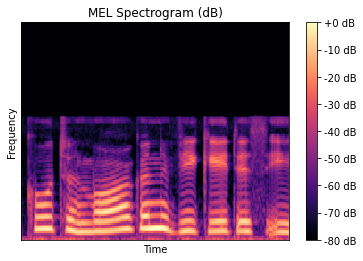

In [17]:
# 4. 데이터 확인하기
for (X_train,Y_train) in train_loader:
    print("X_train : ",X_train.size(),'type:',X_train.type())
    print("Y_train : ",Y_train.size(),'type:',Y_train.type())
    break
    
print(Y_train[0])
librosa.display.specshow(X_train[0][0].numpy(), sr=sr, hop_length=run_config["batch_size"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("MEL Spectrogram (dB)")
#batch: 32 / 3채널 / frame수: 500  /  feature수: 13

X_valid :  torch.Size([32, 3, 128, 300]) type: torch.FloatTensor
Y_valid :  torch.Size([32]) type: torch.LongTensor
tensor(1)


Text(0.5, 1.0, 'MEL Spectrogram (dB)')

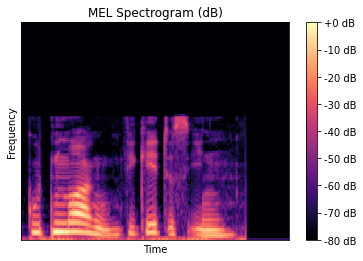

In [18]:
#valiation set 확인
for (X_valid,Y_valid) in validation_loader:
    print("X_valid : ",X_valid.size(),'type:',X_valid.type())
    print("Y_valid : ",Y_valid.size(),'type:',Y_valid.type())
    break

print(Y_valid[0])
librosa.display.specshow(X_valid[0][0].numpy(), sr=sr, hop_length=run_config["batch_size"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("MEL Spectrogram (dB)")

#batch: 32 / 3채널 / frame수: 500  /  feature수: 13

X_valid :  torch.Size([32, 3, 128, 300]) type: torch.FloatTensor
Y_valid :  torch.Size([32]) type: torch.LongTensor
tensor(1)


Text(0.5, 1.0, 'MEL Spectrogram (dB)')

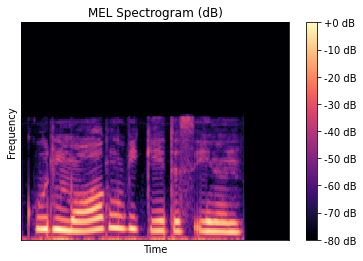

In [19]:
#valiation set 확인
for (test_data,test_label) in validation_loader:
    print("X_valid : ",test_data.size(),'type:',test_data.type())
    print("Y_valid : ",test_label.size(),'type:',test_label.type())
    break

print(Y_valid[0])
librosa.display.specshow(test_data[0][0].numpy(), sr=sr, hop_length=run_config["batch_size"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("MEL Spectrogram (dB)")

#batch: 32 / 3채널 / frame수: 500  /  feature수: 13

# RESNET

In [20]:
# 모델 
# pretrained


def model_initialize():
    model = models.resnet18(pretrained=True).cuda()
    model.ftrs = model.fc.in_features # in_features : fully connected의 입력수.
    num_ftrs = model.fc.in_features
    
    model.fc = nn.Sequential(nn.Linear(num_ftrs, 64),
                             nn.BatchNorm1d(64),
                             nn.ReLU(),
                             nn.Dropout(p=0.5),
                             nn.Linear(64,50),
                             nn.BatchNorm1d(50),
                             nn.ReLU(),
                             nn.Dropout(p=0.5),
                             nn.Linear(50,2)
                            )

    model = model.cuda()
    return model
model=model_initialize()


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [22]:
# get the model summary
from torchsummary import summary
#summary(model, input_size=(3, 128, 300), device=DEVICE.type)

In [23]:
#8. 학습
def train(model,train_loader,optimizer, log_interval):
    model.train()    
    correct = 0
    train_loss = 0
    for batch_idx,(image,label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        #데이터들 장비에 할당
        optimizer.zero_grad() # device 에 저장된 gradient 제거
        output = model(image) # model로 output을 계산
        loss = criterion(output, label) #loss 계산
        train_loss += loss.item()
        prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
        correct += prediction.eq(label.view_as(prediction)).sum().item()# 아웃풋이 배치 사이즈 32개라서.
        loss.backward() # loss 값을 이용해 gradient를 계산
        optimizer.step() # Gradient 값을 이용해 파라미터 업데이트.
    train_loss/=len(train_loader.dataset)
    train_accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss,train_accuracy


In [24]:
#9. 학습 진행하며, validation 데이터로 모델 성능확인
def evaluate(model,valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    #no_grad : 그래디언트 값 계산 막기.
    with torch.no_grad():
        for image, label in valid_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            valid_loss += criterion(output, label).item()
            prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
            correct += prediction.eq(label.view_as(prediction)).sum().item()# 아웃풋이 배치 사이즈 32개라서.
            #true.false값을 sum해줌. item
        valid_loss /= len(valid_loader.dataset)
        valid_accuracy = 100. * correct / len(valid_loader.dataset)
        return valid_loss,valid_accuracy


In [25]:
#데이터 로더 제작 함수

def load_data(data_ind):

    train_loader = torch.utils.data.DataLoader(dataset = 
                                               svd_dataset(
                                                   X_train_list,
                                                   classes,
                                                   transform = transforms.ToTensor(),#이걸 composed로 고쳐서 전처리 하도록 수정. to tensor는 -데이터는 노멀라이즈못함.
                                                   #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),
                                                   mel_params = dict(
                                                         n_mels = wandb.config.n_mels,
                                                         n_fft = wandb.config.n_fft,
                                                         win_length = wandb.config.win_length,
                                                         hop_length = wandb.config.hop_length,
                                                         f_max = wandb.config.f_max
                                                   ),
                                                   data_num=data_ind,
                                                   training=True
                                               ),
                                               batch_size = wandb.config.batch_size,
                                               shuffle = True,
                                               ) # 순서가 암기되는것을 막기위해.

    validation_loader = torch.utils.data.DataLoader(dataset = 
                                               svd_dataset(
                                                   X_valid_list,
                                                   classes,
                                                   transform = transforms.ToTensor(),
                                                   mel_params = dict(
                                                         n_mels = wandb.config.n_mels,
                                                         n_fft = wandb.config.n_fft,
                                                         win_length = wandb.config.win_length,
                                                         hop_length = wandb.config.hop_length,
                                                         f_max = wandb.config.f_max
                                                   ),                      
                                                   #normalize=transforms.Normalize((-56.4917, -56.4917,-56.4917), (17.9446,17.9446,17.9446)),                                               
                                                   data_num=data_ind,
                                                   training=False
                                               ),
                                               batch_size = wandb.config.batch_size,
                                               shuffle = True,) 

    return train_loader,validation_loader



In [26]:
#10. 학습 및 평가.
# resnet34 pretrained true
# kfold 적용

train_accs = []
valid_accs = []



def all_train():
    wandb.init(project="SVD-hyp-sweep", entity="bub3690",config=run_config)
    searching = "batch_size" ## 여기 수정 ##
    data_ind = wandb.config.fold
    check_path = '../../checkpoint/checkpoint_melspectro_resnet18_true_ros_'+str(data_ind)+'_organics.pt'
    print(check_path)
    wandb.run.name = '{} : {}'.format(searching,wandb.config.batch_size)  ### 여기 수정 ###
    print("config:", dict(wandb.config))    

    early_stopping = EarlyStopping(patience = 5, verbose = True, path=check_path)
    train_loader,validation_loader = load_data(data_ind-1)

    best_train_acc = 0 # accuracy 기록용
    best_valid_acc = 0
    
    best_train_loss = 0
    best_valid_loss = 0

    model=model_initialize()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


    print("[{} 교차검증] 학습 시작\n ----- ".format(data_ind))
    for Epoch in range(1,EPOCHS+1):
        train_loss,train_accuracy=train(model,train_loader,optimizer,log_interval=31)
        valid_loss,valid_accuracy = evaluate(model, validation_loader)

        print("\n[EPOCH:{}]\t Train Loss:{:.4f}\t Train Acc:{:.2f} %  | \tValid Loss:{:.4f} \tValid Acc: {:.2f} %\n".
              format(Epoch,train_loss,train_accuracy,valid_loss,valid_accuracy))
        #wandb.log({"metric": run.config.param1, "epoch": epoch})
            
        early_stopping(valid_loss, model)
        if -early_stopping.best_score == valid_loss:
            best_train_acc, best_valid_acc = train_accuracy,valid_accuracy
            best_train_loss, best_valid_loss = train_loss,valid_loss
            
            wandb.log({"Valid/Loss": best_valid_loss, 
                       "Valid/Accuracy": best_valid_acc,
                      }, step=Epoch)
            #wandb.run.summary.update({"best_valid_{}fold_acc".format(data_ind) : best_valid_acc})
        else:
            # 이전 최고 기록을 log
            wandb.log({"Valid/Loss": best_valid_loss, 
                       "Valid/Accuracy": best_valid_acc,
                      }, step=Epoch)

        if early_stopping.early_stop:
                train_accs.append(best_train_acc)
                valid_accs.append(best_valid_acc)
                print("[{} 교차검증] Early stopping".format(data_ind))
                break

        if Epoch==EPOCHS:
            #만약 early stop 없이 40 epoch라서 중지 된 경우.
            train_accs.append(best_train_acc)
            valid_accs.append(best_valid_acc)

In [27]:
wandb.agent(sweep_id, function=all_train)

wandb: Agent Starting Run: 49ssco1m with config:
wandb: 	batch_size: 8
wandb: 	fold: 1
wandb: Currently logged in as: bub3690. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 8, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0831	 Train Acc:61.45 %  | 	Valid Loss:0.0769 	Valid Acc: 62.94 %

Validation loss decreased (inf --> 0.076863).  Saving model ...

[EPOCH:2]	 Train Loss:0.0661	 Train Acc:72.91 %  | 	Valid Loss:0.0617 	Valid Acc: 81.22 %

Validation loss decreased (0.076863 --> 0.061725).  Saving model ...

[EPOCH:3]	 Train Loss:0.0572	 Train Acc:80.91 %  | 	Valid Loss:0.0621 	Valid Acc: 76.14 %

EarlyStopping counter: 1 out of 5

[EPOCH:4]	 Train Loss:0.0495	 Train Acc:84.98 %  | 	Valid Loss:0.0537 	Valid Acc: 81.22 %

Validation loss decreased (0.061725 --> 0.053738).  Saving model ...

[EPOCH:5]	 Train Loss:0.0437	 Train Acc:87.44 %  | 	Valid Loss:0.0524 	Valid Acc: 80.71 %

Validation loss decreased (0.053738 --> 0.052429).  Saving model ..

Valid/Accuracy,▁▆▆▆▆▇▇█████████████
Valid/Loss,█▅▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,86.80203
Valid/Loss,0.03865


wandb: Agent Starting Run: iggkvtef with config:
wandb: 	batch_size: 8
wandb: 	fold: 2
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 8, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0815	 Train Acc:62.44 %  | 	Valid Loss:0.0650 	Valid Acc: 81.73 %

Validation loss decreased (inf --> 0.064955).  Saving model ...

[EPOCH:2]	 Train Loss:0.0633	 Train Acc:76.60 %  | 	Valid Loss:0.0532 	Valid Acc: 86.29 %

Validation loss decreased (0.064955 --> 0.053182).  Saving model ...

[EPOCH:3]	 Train Loss:0.0570	 Train Acc:79.93 %  | 	Valid Loss:0.0463 	Valid Acc: 89.34 %

Validation loss decreased (0.053182 --> 0.046343).  Saving model ...

[EPOCH:4]	 Train Loss:0.0487	 Train Acc:86.33 %  | 	Valid Loss:0.0468 	Valid Acc: 88.32 %

EarlyStopping counter: 1 out of 5

[EPOCH:5]	 Train Loss:0.0396	 Train Acc:90.76 %  | 	Valid Loss:0.0435 	Valid Acc: 86.80 %

Validation loss decreased (0.046343 --> 0.043484).  Saving model ..

Valid/Accuracy,▁▅██▆████▇▇▇▇▇▇▇▇▇▇
Valid/Loss,█▅▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,88.32487
Valid/Loss,0.03638


wandb: Agent Starting Run: 0y21lm24 with config:
wandb: 	batch_size: 8
wandb: 	fold: 3
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_3_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 8, 'fold': 3}
[3 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0788	 Train Acc:64.20 %  | 	Valid Loss:0.0602 	Valid Acc: 83.76 %

Validation loss decreased (inf --> 0.060246).  Saving model ...

[EPOCH:2]	 Train Loss:0.0634	 Train Acc:76.05 %  | 	Valid Loss:0.0570 	Valid Acc: 83.25 %

Validation loss decreased (0.060246 --> 0.057026).  Saving model ...

[EPOCH:3]	 Train Loss:0.0555	 Train Acc:81.36 %  | 	Valid Loss:0.0539 	Valid Acc: 84.26 %

Validation loss decreased (0.057026 --> 0.053852).  Saving model ...

[EPOCH:4]	 Train Loss:0.0479	 Train Acc:85.80 %  | 	Valid Loss:0.0553 	Valid Acc: 85.79 %

EarlyStopping counter: 1 out of 5

[EPOCH:5]	 Train Loss:0.0456	 Train Acc:89.14 %  | 	Valid Loss:0.0533 	Valid Acc: 80.20 %

Validation loss decreased (0.053852 --> 0.053256).  Saving model ..

Valid/Accuracy,▄▃▄▄▁▁▆▆▆██████
Valid/Loss,█▇▆▆▆▆▃▃▂▁▁▁▁▁▁
Valid/Accuracy,88.83249
Valid/Loss,0.03845


wandb: Agent Starting Run: 4fs1p760 with config:
wandb: 	batch_size: 8
wandb: 	fold: 4
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_4_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 8, 'fold': 4}
[4 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0746	 Train Acc:67.53 %  | 	Valid Loss:0.0599 	Valid Acc: 83.25 %

Validation loss decreased (inf --> 0.059858).  Saving model ...

[EPOCH:2]	 Train Loss:0.0672	 Train Acc:75.06 %  | 	Valid Loss:0.0585 	Valid Acc: 80.71 %

Validation loss decreased (0.059858 --> 0.058550).  Saving model ...

[EPOCH:3]	 Train Loss:0.0625	 Train Acc:77.53 %  | 	Valid Loss:0.0564 	Valid Acc: 83.25 %

Validation loss decreased (0.058550 --> 0.056389).  Saving model ...

[EPOCH:4]	 Train Loss:0.0568	 Train Acc:80.25 %  | 	Valid Loss:0.0543 	Valid Acc: 84.77 %

Validation loss decreased (0.056389 --> 0.054321).  Saving model ...

[EPOCH:5]	 Train Loss:0.0509	 Train Acc:84.07 %  | 	Valid Loss:0.0509 	Valid Acc: 84.77 %

Validation loss decreased (0.054

Valid/Accuracy,▄▁▄▅▅▇▇▇▇▇▇▇▇▅▅▂▂▂▆▆▆██████
Valid/Loss,█▇▇▆▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,87.30964
Valid/Loss,0.04195


wandb: Agent Starting Run: n7jyovcm with config:
wandb: 	batch_size: 8
wandb: 	fold: 5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_5_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 8, 'fold': 5}
[5 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0817	 Train Acc:61.21 %  | 	Valid Loss:0.0574 	Valid Acc: 83.67 %

Validation loss decreased (inf --> 0.057413).  Saving model ...

[EPOCH:2]	 Train Loss:0.0638	 Train Acc:74.38 %  | 	Valid Loss:0.0540 	Valid Acc: 83.67 %

Validation loss decreased (0.057413 --> 0.053974).  Saving model ...

[EPOCH:3]	 Train Loss:0.0542	 Train Acc:80.42 %  | 	Valid Loss:0.0448 	Valid Acc: 87.24 %

Validation loss decreased (0.053974 --> 0.044809).  Saving model ...

[EPOCH:4]	 Train Loss:0.0472	 Train Acc:85.96 %  | 	Valid Loss:0.0427 	Valid Acc: 88.78 %

Validation loss decreased (0.044809 --> 0.042668).  Saving model ...

[EPOCH:5]	 Train Loss:0.0398	 Train Acc:88.55 %  | 	Valid Loss:0.0472 	Valid Acc: 86.22 %

EarlyStopping counter: 1 out of 

Valid/Accuracy,▁▁▅▇▇▇▅▄▄▄▄▂▂▂▇██████
Valid/Loss,█▇▄▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,89.28571
Valid/Loss,0.03531


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dyywm00w with config:
wandb: 	batch_size: 16
wandb: 	fold: 1
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 16, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0397	 Train Acc:61.95 %  | 	Valid Loss:0.0372 	Valid Acc: 69.04 %

Validation loss decreased (inf --> 0.037205).  Saving model ...

[EPOCH:2]	 Train Loss:0.0316	 Train Acc:75.37 %  | 	Valid Loss:0.0331 	Valid Acc: 79.70 %

Validation loss decreased (0.037205 --> 0.033111).  Saving model ...

[EPOCH:3]	 Train Loss:0.0276	 Train Acc:84.61 %  | 	Valid Loss:0.0324 	Valid Acc: 81.73 %

Validation loss decreased (0.033111 --> 0.032392).  Saving model ...

[EPOCH:4]	 Train Loss:0.0230	 Train Acc:91.13 %  | 	Valid Loss:0.0313 	Valid Acc: 81.73 %

Validation loss decreased (0.032392 --> 0.031276).  Saving model ...

[EPOCH:5]	 Train Loss:0.0200	 Train Acc:93.72 %  | 	Valid Loss:0.0280 	Valid Acc: 81.73 %

Validation loss decreased (0.03

Valid/Accuracy,▁▅▆▆▆▆▆▆▇▇▇▇▇██████
Valid/Loss,█▆▆▅▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,88.32487
Valid/Loss,0.02295


wandb: Agent Starting Run: qkkcd9ie with config:
wandb: 	batch_size: 16
wandb: 	fold: 2
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 16, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0402	 Train Acc:64.04 %  | 	Valid Loss:0.0329 	Valid Acc: 78.68 %

Validation loss decreased (inf --> 0.032935).  Saving model ...

[EPOCH:2]	 Train Loss:0.0298	 Train Acc:78.33 %  | 	Valid Loss:0.0301 	Valid Acc: 78.17 %

Validation loss decreased (0.032935 --> 0.030055).  Saving model ...

[EPOCH:3]	 Train Loss:0.0234	 Train Acc:84.85 %  | 	Valid Loss:0.0257 	Valid Acc: 87.31 %

Validation loss decreased (0.030055 --> 0.025712).  Saving model ...

[EPOCH:4]	 Train Loss:0.0196	 Train Acc:91.26 %  | 	Valid Loss:0.0240 	Valid Acc: 85.28 %

Validation loss decreased (0.025712 --> 0.024017).  Saving model ...

[EPOCH:5]	 Train Loss:0.0160	 Train Acc:94.21 %  | 	Valid Loss:0.0264 	Valid Acc: 85.79 %

EarlyStopping counter: 1 out of

Valid/Accuracy,▁▁▇▆▆▇▇█████████
Valid/Loss,█▆▄▃▃▂▂▁▁▁▁▁▁▁▁▁
Valid/Accuracy,88.32487
Valid/Loss,0.02018


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v6agtdzq with config:
wandb: 	batch_size: 16
wandb: 	fold: 3
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_3_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 16, 'fold': 3}
[3 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0389	 Train Acc:65.06 %  | 	Valid Loss:0.0309 	Valid Acc: 80.71 %

Validation loss decreased (inf --> 0.030891).  Saving model ...

[EPOCH:2]	 Train Loss:0.0302	 Train Acc:77.90 %  | 	Valid Loss:0.0262 	Valid Acc: 84.77 %

Validation loss decreased (0.030891 --> 0.026204).  Saving model ...

[EPOCH:3]	 Train Loss:0.0255	 Train Acc:83.46 %  | 	Valid Loss:0.0245 	Valid Acc: 85.79 %

Validation loss decreased (0.026204 --> 0.024510).  Saving model ...

[EPOCH:4]	 Train Loss:0.0214	 Train Acc:89.26 %  | 	Valid Loss:0.0241 	Valid Acc: 86.29 %

Validation loss decreased (0.024510 --> 0.024112).  Saving model ...

[EPOCH:5]	 Train Loss:0.0191	 Train Acc:91.85 %  | 	Valid Loss:0.0235 	Valid Acc: 84.26 %

Validation loss decreased (0.02

Valid/Accuracy,▁▅▆▆▄▄▇▇▇▇▇██████
Valid/Loss,█▅▄▄▃▃▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,88.32487
Valid/Loss,0.02024


wandb: Agent Starting Run: 0j40wp3a with config:
wandb: 	batch_size: 16
wandb: 	fold: 4
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_4_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 16, 'fold': 4}
[4 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0383	 Train Acc:66.54 %  | 	Valid Loss:0.0321 	Valid Acc: 79.19 %

Validation loss decreased (inf --> 0.032119).  Saving model ...

[EPOCH:2]	 Train Loss:0.0294	 Train Acc:78.89 %  | 	Valid Loss:0.0272 	Valid Acc: 85.28 %

Validation loss decreased (0.032119 --> 0.027174).  Saving model ...

[EPOCH:3]	 Train Loss:0.0240	 Train Acc:86.79 %  | 	Valid Loss:0.0250 	Valid Acc: 85.79 %

Validation loss decreased (0.027174 --> 0.025001).  Saving model ...

[EPOCH:4]	 Train Loss:0.0196	 Train Acc:90.86 %  | 	Valid Loss:0.0247 	Valid Acc: 87.82 %

Validation loss decreased (0.025001 --> 0.024685).  Saving model ...

[EPOCH:5]	 Train Loss:0.0164	 Train Acc:95.06 %  | 	Valid Loss:0.0243 	Valid Acc: 85.28 %

Validation loss decreased (0.02

Valid/Accuracy,▁▅▅▇▅█▇▆▆▆▇▇▇█████▆▆▆▆▆▆
Valid/Loss,█▆▄▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,87.30964
Valid/Loss,0.01805


wandb: Agent Starting Run: 59o6gjbt with config:
wandb: 	batch_size: 16
wandb: 	fold: 5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_5_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 16, 'fold': 5}
[5 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0391	 Train Acc:63.67 %  | 	Valid Loss:0.0335 	Valid Acc: 81.12 %

Validation loss decreased (inf --> 0.033450).  Saving model ...

[EPOCH:2]	 Train Loss:0.0304	 Train Acc:81.65 %  | 	Valid Loss:0.0265 	Valid Acc: 86.22 %

Validation loss decreased (0.033450 --> 0.026521).  Saving model ...

[EPOCH:3]	 Train Loss:0.0259	 Train Acc:86.82 %  | 	Valid Loss:0.0277 	Valid Acc: 86.73 %

EarlyStopping counter: 1 out of 5

[EPOCH:4]	 Train Loss:0.0229	 Train Acc:89.66 %  | 	Valid Loss:0.0249 	Valid Acc: 88.78 %

Validation loss decreased (0.026521 --> 0.024949).  Saving model ...

[EPOCH:5]	 Train Loss:0.0193	 Train Acc:95.20 %  | 	Valid Loss:0.0241 	Valid Acc: 89.80 %

Validation loss decreased (0.024949 --> 0.024059).  Saving model .

Valid/Accuracy,▁▅▅▇██▆██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Valid/Loss,█▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,89.28571
Valid/Loss,0.01786


wandb: Agent Starting Run: ux0k3vcz with config:
wandb: 	batch_size: 32
wandb: 	fold: 1
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 32, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0194	 Train Acc:66.26 %  | 	Valid Loss:0.0210 	Valid Acc: 67.51 %

Validation loss decreased (inf --> 0.020992).  Saving model ...

[EPOCH:2]	 Train Loss:0.0155	 Train Acc:79.06 %  | 	Valid Loss:0.0183 	Valid Acc: 74.11 %

Validation loss decreased (0.020992 --> 0.018310).  Saving model ...

[EPOCH:3]	 Train Loss:0.0132	 Train Acc:86.45 %  | 	Valid Loss:0.0178 	Valid Acc: 78.17 %

Validation loss decreased (0.018310 --> 0.017827).  Saving model ...

[EPOCH:4]	 Train Loss:0.0118	 Train Acc:90.89 %  | 	Valid Loss:0.0162 	Valid Acc: 81.73 %

Validation loss decreased (0.017827 --> 0.016163).  Saving model ...

[EPOCH:5]	 Train Loss:0.0101	 Train Acc:95.07 %  | 	Valid Loss:0.0165 	Valid Acc: 83.76 %

EarlyStopping counter: 1 out of

Valid/Accuracy,▁▄▆▇▇███████████
Valid/Loss,█▆▅▄▄▃▃▂▂▂▁▁▁▁▁▁
Valid/Accuracy,83.24873
Valid/Loss,0.01274


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 38d883ld with config:
wandb: 	batch_size: 32
wandb: 	fold: 2
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 32, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0199	 Train Acc:61.70 %  | 	Valid Loss:0.0212 	Valid Acc: 69.04 %

Validation loss decreased (inf --> 0.021162).  Saving model ...

[EPOCH:2]	 Train Loss:0.0163	 Train Acc:76.60 %  | 	Valid Loss:0.0192 	Valid Acc: 74.11 %

Validation loss decreased (0.021162 --> 0.019202).  Saving model ...

[EPOCH:3]	 Train Loss:0.0141	 Train Acc:84.61 %  | 	Valid Loss:0.0169 	Valid Acc: 79.19 %

Validation loss decreased (0.019202 --> 0.016873).  Saving model ...

[EPOCH:4]	 Train Loss:0.0130	 Train Acc:86.70 %  | 	Valid Loss:0.0163 	Valid Acc: 83.25 %

Validation loss decreased (0.016873 --> 0.016258).  Saving model ...

[EPOCH:5]	 Train Loss:0.0112	 Train Acc:92.73 %  | 	Valid Loss:0.0156 	Valid Acc: 83.76 %

Validation loss decreased (0.01

Valid/Accuracy,▁▃▆█████▇▇██████
Valid/Loss,█▆▄▄▃▃▃▂▂▁▁▁▁▁▁▁
Valid/Accuracy,83.75635
Valid/Loss,0.01291


wandb: Agent Starting Run: fig6w8m5 with config:
wandb: 	batch_size: 32
wandb: 	fold: 3
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_3_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 32, 'fold': 3}
[3 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0204	 Train Acc:63.95 %  | 	Valid Loss:0.0179 	Valid Acc: 82.74 %

Validation loss decreased (inf --> 0.017926).  Saving model ...

[EPOCH:2]	 Train Loss:0.0164	 Train Acc:76.91 %  | 	Valid Loss:0.0158 	Valid Acc: 83.76 %

Validation loss decreased (0.017926 --> 0.015801).  Saving model ...

[EPOCH:3]	 Train Loss:0.0145	 Train Acc:80.74 %  | 	Valid Loss:0.0140 	Valid Acc: 83.76 %

Validation loss decreased (0.015801 --> 0.014041).  Saving model ...

[EPOCH:4]	 Train Loss:0.0127	 Train Acc:87.04 %  | 	Valid Loss:0.0140 	Valid Acc: 84.26 %

Validation loss decreased (0.014041 --> 0.013979).  Saving model ...

[EPOCH:5]	 Train Loss:0.0110	 Train Acc:90.49 %  | 	Valid Loss:0.0130 	Valid Acc: 87.31 %

Validation loss decreased (0.01

Valid/Accuracy,▁▃▃▃█▅▅▆▅▅▅▆▆▆▆▆▆▆
Valid/Loss,█▆▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁
Valid/Accuracy,85.7868
Valid/Loss,0.01062


wandb: Agent Starting Run: 4xda13lx with config:
wandb: 	batch_size: 32
wandb: 	fold: 4
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_4_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 32, 'fold': 4}
[4 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0200	 Train Acc:64.07 %  | 	Valid Loss:0.0198 	Valid Acc: 74.62 %

Validation loss decreased (inf --> 0.019758).  Saving model ...

[EPOCH:2]	 Train Loss:0.0156	 Train Acc:78.52 %  | 	Valid Loss:0.0180 	Valid Acc: 81.73 %

Validation loss decreased (0.019758 --> 0.017994).  Saving model ...

[EPOCH:3]	 Train Loss:0.0135	 Train Acc:83.33 %  | 	Valid Loss:0.0143 	Valid Acc: 86.29 %

Validation loss decreased (0.017994 --> 0.014335).  Saving model ...

[EPOCH:4]	 Train Loss:0.0121	 Train Acc:89.63 %  | 	Valid Loss:0.0172 	Valid Acc: 82.23 %

EarlyStopping counter: 1 out of 5

[EPOCH:5]	 Train Loss:0.0111	 Train Acc:92.10 %  | 	Valid Loss:0.0142 	Valid Acc: 88.83 %

Validation loss decreased (0.014335 --> 0.014197).  Saving model .

Valid/Accuracy,▁▅▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇
Valid/Loss,█▆▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,86.29442
Valid/Loss,0.01158


wandb: Agent Starting Run: pz8222zp with config:
wandb: 	batch_size: 32
wandb: 	fold: 5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_5_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 32, 'fold': 5}
[5 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0210	 Train Acc:61.21 %  | 	Valid Loss:0.0200 	Valid Acc: 78.06 %

Validation loss decreased (inf --> 0.019982).  Saving model ...

[EPOCH:2]	 Train Loss:0.0171	 Train Acc:73.52 %  | 	Valid Loss:0.0175 	Valid Acc: 79.08 %

Validation loss decreased (0.019982 --> 0.017537).  Saving model ...

[EPOCH:3]	 Train Loss:0.0145	 Train Acc:80.54 %  | 	Valid Loss:0.0149 	Valid Acc: 89.29 %

Validation loss decreased (0.017537 --> 0.014850).  Saving model ...

[EPOCH:4]	 Train Loss:0.0125	 Train Acc:86.21 %  | 	Valid Loss:0.0141 	Valid Acc: 85.71 %

Validation loss decreased (0.014850 --> 0.014136).  Saving model ...

[EPOCH:5]	 Train Loss:0.0114	 Train Acc:89.16 %  | 	Valid Loss:0.0130 	Valid Acc: 89.80 %

Validation loss decreased (0.01

Valid/Accuracy,▁▂▇▅▇▇▆▆▆▆▆▆████▇▇▇▇▇▇
Valid/Loss,█▆▄▄▃▃▃▃▃▃▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,88.26531
Valid/Loss,0.00975


wandb: Agent Starting Run: 73ugmxim with config:
wandb: 	batch_size: 64
wandb: 	fold: 1
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 64, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0101	 Train Acc:64.41 %  | 	Valid Loss:0.0137 	Valid Acc: 63.96 %

Validation loss decreased (inf --> 0.013728).  Saving model ...

[EPOCH:2]	 Train Loss:0.0078	 Train Acc:78.45 %  | 	Valid Loss:0.0106 	Valid Acc: 81.73 %

Validation loss decreased (0.013728 --> 0.010576).  Saving model ...

[EPOCH:3]	 Train Loss:0.0069	 Train Acc:84.98 %  | 	Valid Loss:0.0100 	Valid Acc: 77.16 %

Validation loss decreased (0.010576 --> 0.009990).  Saving model ...

[EPOCH:4]	 Train Loss:0.0060	 Train Acc:89.53 %  | 	Valid Loss:0.0085 	Valid Acc: 83.25 %

Validation loss decreased (0.009990 --> 0.008521).  Saving model ...

[EPOCH:5]	 Train Loss:0.0053	 Train Acc:92.61 %  | 	Valid Loss:0.0083 	Valid Acc: 85.28 %

Validation loss decreased (0.00

Valid/Accuracy,▁▆▅▇██▇████████████
Valid/Loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,86.80203
Valid/Loss,0.00696


wandb: Agent Starting Run: m3pc3p4f with config:
wandb: 	batch_size: 64
wandb: 	fold: 2
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 64, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0110	 Train Acc:57.14 %  | 	Valid Loss:0.0148 	Valid Acc: 48.73 %

Validation loss decreased (inf --> 0.014796).  Saving model ...

[EPOCH:2]	 Train Loss:0.0086	 Train Acc:72.41 %  | 	Valid Loss:0.0104 	Valid Acc: 80.71 %

Validation loss decreased (0.014796 --> 0.010444).  Saving model ...

[EPOCH:3]	 Train Loss:0.0076	 Train Acc:79.06 %  | 	Valid Loss:0.0092 	Valid Acc: 83.76 %

Validation loss decreased (0.010444 --> 0.009157).  Saving model ...

[EPOCH:4]	 Train Loss:0.0067	 Train Acc:85.47 %  | 	Valid Loss:0.0104 	Valid Acc: 79.19 %

EarlyStopping counter: 1 out of 5

[EPOCH:5]	 Train Loss:0.0064	 Train Acc:87.56 %  | 	Valid Loss:0.0090 	Valid Acc: 81.73 %

Validation loss decreased (0.009157 --> 0.009044).  Saving model .

Valid/Accuracy,▁▇▇▇▇▇████▇▇▇▇▇▇███████████
Valid/Loss,█▅▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,84.26396
Valid/Loss,0.00607


wandb: Agent Starting Run: kndejziv with config:
wandb: 	batch_size: 64
wandb: 	fold: 3
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_3_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 64, 'fold': 3}
[3 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0109	 Train Acc:58.27 %  | 	Valid Loss:0.0147 	Valid Acc: 51.78 %

Validation loss decreased (inf --> 0.014654).  Saving model ...

[EPOCH:2]	 Train Loss:0.0084	 Train Acc:71.48 %  | 	Valid Loss:0.0110 	Valid Acc: 71.57 %

Validation loss decreased (0.014654 --> 0.010970).  Saving model ...

[EPOCH:3]	 Train Loss:0.0073	 Train Acc:80.12 %  | 	Valid Loss:0.0084 	Valid Acc: 78.17 %

Validation loss decreased (0.010970 --> 0.008434).  Saving model ...

[EPOCH:4]	 Train Loss:0.0069	 Train Acc:84.57 %  | 	Valid Loss:0.0097 	Valid Acc: 84.77 %

EarlyStopping counter: 1 out of 5

[EPOCH:5]	 Train Loss:0.0058	 Train Acc:89.88 %  | 	Valid Loss:0.0080 	Valid Acc: 84.26 %

Validation loss decreased (0.008434 --> 0.007986).  Saving model .

Valid/Accuracy,▁▅▆▆▇▇▇███████████
Valid/Loss,█▅▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁
Valid/Accuracy,87.30964
Valid/Loss,0.00608


wandb: Agent Starting Run: uw0zh4rh with config:
wandb: 	batch_size: 64
wandb: 	fold: 4
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_4_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 64, 'fold': 4}
[4 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0108	 Train Acc:60.25 %  | 	Valid Loss:0.0140 	Valid Acc: 49.75 %

Validation loss decreased (inf --> 0.013952).  Saving model ...

[EPOCH:2]	 Train Loss:0.0089	 Train Acc:70.00 %  | 	Valid Loss:0.0119 	Valid Acc: 77.66 %

Validation loss decreased (0.013952 --> 0.011915).  Saving model ...

[EPOCH:3]	 Train Loss:0.0076	 Train Acc:80.62 %  | 	Valid Loss:0.0103 	Valid Acc: 82.23 %

Validation loss decreased (0.011915 --> 0.010273).  Saving model ...

[EPOCH:4]	 Train Loss:0.0072	 Train Acc:80.99 %  | 	Valid Loss:0.0082 	Valid Acc: 85.28 %

Validation loss decreased (0.010273 --> 0.008237).  Saving model ...

[EPOCH:5]	 Train Loss:0.0063	 Train Acc:87.90 %  | 	Valid Loss:0.0096 	Valid Acc: 87.31 %

EarlyStopping counter: 1 out of

Valid/Accuracy,▁▆▇▇▇▇▇██████████████▇██████████████████
Valid/Loss,█▆▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,89.3401
Valid/Loss,0.00454


wandb: Agent Starting Run: vxai22z6 with config:
wandb: 	batch_size: 64
wandb: 	fold: 5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_5_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 64, 'fold': 5}
[5 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0104	 Train Acc:60.47 %  | 	Valid Loss:0.0136 	Valid Acc: 68.37 %

Validation loss decreased (inf --> 0.013585).  Saving model ...

[EPOCH:2]	 Train Loss:0.0090	 Train Acc:69.58 %  | 	Valid Loss:0.0114 	Valid Acc: 80.61 %

Validation loss decreased (0.013585 --> 0.011374).  Saving model ...

[EPOCH:3]	 Train Loss:0.0079	 Train Acc:77.96 %  | 	Valid Loss:0.0096 	Valid Acc: 85.71 %

Validation loss decreased (0.011374 --> 0.009581).  Saving model ...

[EPOCH:4]	 Train Loss:0.0071	 Train Acc:82.27 %  | 	Valid Loss:0.0090 	Valid Acc: 87.24 %

Validation loss decreased (0.009581 --> 0.008990).  Saving model ...

[EPOCH:5]	 Train Loss:0.0065	 Train Acc:86.21 %  | 	Valid Loss:0.0076 	Valid Acc: 87.76 %

Validation loss decreased (0.00

Valid/Accuracy,▁▅▇██████████
Valid/Loss,█▆▄▃▂▂▂▁▁▁▁▁▁
Valid/Accuracy,87.7551
Valid/Loss,0.00667


wandb: Agent Starting Run: 0exyeqei with config:
wandb: 	batch_size: 128
wandb: 	fold: 1
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_1_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 128, 'fold': 1}
[1 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0056	 Train Acc:59.73 %  | 	Valid Loss:0.0070 	Valid Acc: 60.41 %

Validation loss decreased (inf --> 0.006972).  Saving model ...

[EPOCH:2]	 Train Loss:0.0043	 Train Acc:75.74 %  | 	Valid Loss:0.0064 	Valid Acc: 65.48 %

Validation loss decreased (0.006972 --> 0.006412).  Saving model ...

[EPOCH:3]	 Train Loss:0.0040	 Train Acc:79.80 %  | 	Valid Loss:0.0051 	Valid Acc: 81.73 %

Validation loss decreased (0.006412 --> 0.005133).  Saving model ...

[EPOCH:4]	 Train Loss:0.0037	 Train Acc:83.99 %  | 	Valid Loss:0.0047 	Valid Acc: 81.22 %

Validation loss decreased (0.005133 --> 0.004741).  Saving model ...

[EPOCH:5]	 Train Loss:0.0033	 Train Acc:89.90 %  | 	Valid Loss:0.0046 	Valid Acc: 81.22 %

Validation loss decreased (0.0

Valid/Accuracy,▁▂▇▇▇▇▇▇▇▇▇████████████████
Valid/Loss,█▇▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,85.7868
Valid/Loss,0.00359


wandb: Agent Starting Run: o8ugma0l with config:
wandb: 	batch_size: 128
wandb: 	fold: 2
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_2_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 128, 'fold': 2}
[2 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0057	 Train Acc:61.58 %  | 	Valid Loss:0.0070 	Valid Acc: 54.82 %

Validation loss decreased (inf --> 0.007017).  Saving model ...

[EPOCH:2]	 Train Loss:0.0044	 Train Acc:75.37 %  | 	Valid Loss:0.0065 	Valid Acc: 61.93 %

Validation loss decreased (0.007017 --> 0.006503).  Saving model ...

[EPOCH:3]	 Train Loss:0.0039	 Train Acc:79.56 %  | 	Valid Loss:0.0051 	Valid Acc: 78.68 %

Validation loss decreased (0.006503 --> 0.005141).  Saving model ...

[EPOCH:4]	 Train Loss:0.0037	 Train Acc:83.25 %  | 	Valid Loss:0.0045 	Valid Acc: 82.23 %

Validation loss decreased (0.005141 --> 0.004527).  Saving model ...

[EPOCH:5]	 Train Loss:0.0033	 Train Acc:87.44 %  | 	Valid Loss:0.0042 	Valid Acc: 84.26 %

Validation loss decreased (0.0

Valid/Accuracy,▁▃▆▇████▇▇████████████████
Valid/Loss,█▇▄▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,84.77157
Valid/Loss,0.00347


wandb: Agent Starting Run: wsx0agfr with config:
wandb: 	batch_size: 128
wandb: 	fold: 3
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_3_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 128, 'fold': 3}
[3 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0057	 Train Acc:58.64 %  | 	Valid Loss:0.0070 	Valid Acc: 45.69 %

Validation loss decreased (inf --> 0.007022).  Saving model ...

[EPOCH:2]	 Train Loss:0.0048	 Train Acc:72.96 %  | 	Valid Loss:0.0065 	Valid Acc: 71.07 %

Validation loss decreased (0.007022 --> 0.006538).  Saving model ...

[EPOCH:3]	 Train Loss:0.0044	 Train Acc:79.38 %  | 	Valid Loss:0.0055 	Valid Acc: 79.70 %

Validation loss decreased (0.006538 --> 0.005542).  Saving model ...

[EPOCH:4]	 Train Loss:0.0041	 Train Acc:82.84 %  | 	Valid Loss:0.0050 	Valid Acc: 81.73 %

Validation loss decreased (0.005542 --> 0.005038).  Saving model ...

[EPOCH:5]	 Train Loss:0.0040	 Train Acc:84.81 %  | 	Valid Loss:0.0049 	Valid Acc: 83.76 %

Validation loss decreased (0.0

Valid/Accuracy,▁▅▇▇▇▇▇▇██████████████████████████████
Valid/Loss,█▇▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,88.32487
Valid/Loss,0.00313


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q12cyk98 with config:
wandb: 	batch_size: 128
wandb: 	fold: 4
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_4_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 128, 'fold': 4}
[4 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0059	 Train Acc:56.67 %  | 	Valid Loss:0.0070 	Valid Acc: 45.69 %

Validation loss decreased (inf --> 0.007043).  Saving model ...

[EPOCH:2]	 Train Loss:0.0048	 Train Acc:68.89 %  | 	Valid Loss:0.0066 	Valid Acc: 73.10 %

Validation loss decreased (0.007043 --> 0.006607).  Saving model ...

[EPOCH:3]	 Train Loss:0.0043	 Train Acc:76.30 %  | 	Valid Loss:0.0054 	Valid Acc: 78.17 %

Validation loss decreased (0.006607 --> 0.005364).  Saving model ...

[EPOCH:4]	 Train Loss:0.0041	 Train Acc:78.27 %  | 	Valid Loss:0.0049 	Valid Acc: 79.70 %

Validation loss decreased (0.005364 --> 0.004879).  Saving model ...

[EPOCH:5]	 Train Loss:0.0038	 Train Acc:83.46 %  | 	Valid Loss:0.0047 	Valid Acc: 81.73 %

Validation loss decreased (0.0

Valid/Accuracy,▁▆▇▇▇▇▇▇█▇███████████▇▇██████
Valid/Loss,█▇▅▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid/Accuracy,86.80203
Valid/Loss,0.00353


wandb: Agent Starting Run: 0bw17da9 with config:
wandb: 	batch_size: 128
wandb: 	fold: 5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


../../checkpoint/checkpoint_melspectro_resnet18_true_ros_5_organics.pt
config: {'sample_rate': 16000, 'n_fft': 1024, 'n_mels': 128, 'hop_length': 100, 'win_length': 400, 'f_max': 80000, 'batch_size': 128, 'fold': 5}
[5 교차검증] 학습 시작
 ----- 

[EPOCH:1]	 Train Loss:0.0058	 Train Acc:60.10 %  | 	Valid Loss:0.0070 	Valid Acc: 52.55 %

Validation loss decreased (inf --> 0.006977).  Saving model ...

[EPOCH:2]	 Train Loss:0.0048	 Train Acc:73.89 %  | 	Valid Loss:0.0063 	Valid Acc: 69.90 %

Validation loss decreased (0.006977 --> 0.006339).  Saving model ...

[EPOCH:3]	 Train Loss:0.0042	 Train Acc:78.20 %  | 	Valid Loss:0.0053 	Valid Acc: 81.63 %

Validation loss decreased (0.006339 --> 0.005327).  Saving model ...

[EPOCH:4]	 Train Loss:0.0039	 Train Acc:82.02 %  | 	Valid Loss:0.0045 	Valid Acc: 83.16 %

Validation loss decreased (0.005327 --> 0.004538).  Saving model ...

[EPOCH:5]	 Train Loss:0.0035	 Train Acc:85.59 %  | 	Valid Loss:0.0043 	Valid Acc: 84.18 %

Validation loss decreased (0.0

Valid/Accuracy,▁▅▇▇▇▇▇███████████████
Valid/Loss,█▇▅▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
Valid/Accuracy,85.71429
Valid/Loss,0.00335


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


# Model 결과 확인

In [25]:
sum_valid=0
for data_ind in range(5):
    print("[{} 교차검증] train ACC : {:.4f} |\t valid ACC: {:.4f} ".format(data_ind+1,train_accs[data_ind],valid_accs[data_ind] ))
    sum_valid+=valid_accs[data_ind]
    
print("평균 검증 정확도",sum_valid/5,"%")

[1 교차검증] train ACC : 85.5911 |	 valid ACC: 76.1421 
[2 교차검증] train ACC : 100.0000 |	 valid ACC: 86.8020 
[3 교차검증] train ACC : 99.8765 |	 valid ACC: 82.7411 
[4 교차검증] train ACC : 100.0000 |	 valid ACC: 84.2640 
[5 교차검증] train ACC : 99.8768 |	 valid ACC: 86.2245 
평균 검증 정확도 83.23474567491971 %


# Model Test

- test set
- confusion matrix

In [26]:
#confusion matrix 계산
#test set 계산.
def test_evaluate(model,test_loader):
    model.eval()
    test_loss = 0
    predictions = []
    answers = []
    #no_grad : 그래디언트 값 계산 막기.
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
            answers +=label
            predictions +=prediction
            
        return predictions,answers,test_loss
            

In [27]:
# Confusion matrix (resnet18)
# kfold의 confusion matrix는 계산 방법이 다르다.
# 모델을 각각 불러와서 test set을 평가한다.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

cf = np.zeros((2,2))
cf_list = []
average_accuracy = 0
average_fscore = 0
average_uar = 0

for data_ind in range(1,6):

    check_path = '../../checkpoint/checkpoint_melspectro_resnet18_true_ros_'+str(data_ind)+'_organics.pt'
    model.load_state_dict(torch.load(check_path))

    predictions,answers,test_loss = test_evaluate(model, test_loader)
    predictions=[ dat.cpu().numpy() for dat in predictions]
    answers=[ dat.cpu().numpy() for dat in answers]

    
    cf = confusion_matrix(answers, predictions)
    cf_list.append(cf)
    
    acc = (cf[0,0]+cf[1,1])/(cf[0,0]+cf[0,1]+cf[1,0]+cf[1,1])
    average_accuracy+=acc
    
    precision=cf[0,0]/(cf[0,0]+cf[1,0])
    recall=cf[0,0]/(cf[0,0]+cf[1,0])
    
    specificity=cf[1,1]/(cf[0,1]+cf[1,1])
    average_uar += (specificity+recall)/2
    #fscore=2*precision*recall/(precision+recall)
    
    #fscroe macro추가
    fscore = f1_score(answers,predictions,average='macro')
    average_fscore+=fscore
    
    print('{}번 모델'.format(data_ind))
    print("Accuracy : {:.4f}% ".format(acc*100))
    #print("Precision (pathology 예측한 것중 맞는 것) : {:.4f}".format(precision))
    print("recall (실제 pathology 중  예측이 맞는 것) : {:.4f}".format(recall))
    print("specificity : {:.4f}%".format(specificity))
    print("UAR : {:.4f}%".format( (specificity+recall)/2 ))
    
    
    print("f score : {:.4f} ".format(fscore))
    print(cf)
    print("-----")
    #### wandb
    
    wandb.run.summary.update({"test_{}fold_acc".format(data_ind) : acc*100})
    wandb.run.summary.update({"test_{}fold_f1".format(data_ind) : fscore})
    wandb.run.summary.update({"test_{}fold_UAR".format(data_ind) : (specificity+recall)/2})
    wandb.log({"{}fold Confusion Matrix".format(data_ind) :wandb.sklearn.plot_confusion_matrix(answers, predictions, labels=classes)})
    
    ####
    
    
    

print("평균 acc : {:.4f}".format(average_accuracy/5))
print("평균 UAR : {:.4f}".format(average_uar/5))
print("평균 f1score : {:.4f}".format(average_fscore/5))
wandb.run.summary.update({"test 평균 acc" : average_accuracy/5})
wandb.run.summary.update({"test 평균 f1" : average_fscore/5})
wandb.run.summary.update({"test 평균 UAR" : average_uar/5})



1번 모델
Accuracy : 81.3765% 
recall (실제 pathology 중  예측이 맞는 것) : 0.7803
specificity : 0.8522%
UAR : 0.8162%
f score : 0.8137 
[[103  17]
 [ 29  98]]
-----
2번 모델
Accuracy : 85.4251% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8443
specificity : 0.8640%
UAR : 0.8541%
f score : 0.8542 
[[103  17]
 [ 19 108]]
-----
3번 모델
Accuracy : 82.9960% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8197
specificity : 0.8400%
UAR : 0.8298%
f score : 0.8299 
[[100  20]
 [ 22 105]]
-----
4번 모델
Accuracy : 85.0202% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8673
specificity : 0.8358%
UAR : 0.8515%
f score : 0.8497 
[[ 98  22]
 [ 15 112]]
-----
5번 모델
Accuracy : 83.4008% 
recall (실제 pathology 중  예측이 맞는 것) : 0.8496
specificity : 0.8209%
UAR : 0.8352%
f score : 0.8335 
[[ 96  24]
 [ 17 110]]
-----
평균 acc : 0.8364
평균 UAR : 0.8374
평균 f1score : 0.8362
